<a href="https://colab.research.google.com/github/ivetoak/hello-world/blob/main/Pandas_Pontia_curso_introduccion_%2B_Reto_libreria_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias


In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
pd.set_option('display.float_format', lambda x: '%.2f' % x) # truco para notación cientifica

# Carga de archivos con Google Colab

In [109]:
# from google
uploaded = files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (3).csv


In [111]:
#parseamos el archivo

df = pd.read_csv(io.StringIO(uploaded['CAR DETAILS FROM CAR DEKHO (3).csv'].decode('utf-8')))
df.head(2)

#documentacion : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [112]:
df.shape

(4340, 8)

# Analisis preliminar

## Head , tail, describe , value_counts , dtypes & hist

In [113]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [114]:
df.shape

(4340, 8)

In [116]:
df.describe()

,year,selling_price,km_driven
count,4340.00,4340.00,4340.00
mean,2013.09,504127.31,66215.78
std,4.22,578548.74,46644.10
min,1992.00,20000.00,1.00
25%,2011.00,208749.75,35000.00
50%,2014.00,350000.00,60000.00
75%,2016.00,600000.00,90000.00
max,2020.00,8900000.00,806599.00


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>, <Axes: >]], dtype=object)

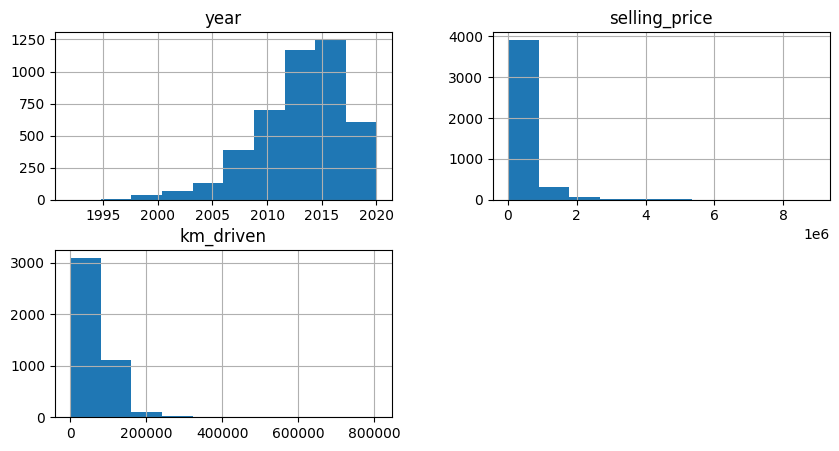

In [117]:
df.hist(figsize = (10,5))

In [118]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [119]:
# coche mas repetido en dataset
df.name.value_counts()

,count
name,
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Hyundai EON Era Plus,35
Maruti Alto LX,35
...,...
Honda Brio 1.2 S Option MT,1
Mahindra Bolero Power Plus Plus Non AC BSIV PS,1
Tata Indigo LS BSII,1


## Busqueda de nulos y sustitución

In [120]:
#chequeo nulos
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [121]:
#añadimos fake nulos
df.selling_price.iloc[1] = np.nan

/tmp/ipython-input-3760481300.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.selling_price.iloc[1] = np.nan
/tmp/ipython-input-3760481300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [122]:
#comprobamos de nuevo nulos
df.isnull().sum()

,0
name,0
year,0
selling_price,1
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [123]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.00,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,NaN,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.00,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.00,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.00,141000,Diesel,Individual,Manual,Second Owner


#### Principales soluciones ante nulos

In [132]:
#df.fillna(0).head()

In [133]:
df = df[df['selling_price'].notna()]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.00,70000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.00,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.00,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.00,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000.00,125000,Petrol,Individual,Manual,First Owner


In [134]:
df.shape

(4339, 8)

## Matriz de correlación

In [135]:
#matriz de correlacion
df_numeric = df.select_dtypes(include=np.number)
df_numeric.corr()

,year,selling_price,km_driven
year,1.00,0.41,-0.42
selling_price,0.41,1.00,-0.19
km_driven,-0.42,-0.19,1.00


In [136]:
#variable antes de acceder a ella.

In [137]:
df.groupby(["name","year"]).agg({"selling_price":"max"}).reset_index().sort_values(by = "selling_price", ascending = False).rename(columns = {"selling_price":"precio_venta"}).head(20)

,name,year,precio_venta
33,Audi RS7 2015-2019 Sportback Performance,2016,8900000.00
1896,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000.00
1889,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000.00
55,BMW X5 xDrive 30d xLine,2019,4950000.00
41,BMW 5 Series 520d Luxury Line,2018,4800000.00
42,BMW 5 Series 520d Luxury Line,2019,4800000.00
11,Audi A5 Sportback,2020,4700000.00
2498,Volvo XC 90 D5 Inscription BSIV,2017,4500000.00
1887,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000.00
1888,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000.00


In [138]:
df.groupby(["name","year"]).agg({"selling_price":"max"}).reset_index().sort_values(by = "selling_price", ascending = False).rename(columns = {"selling_price":"precio_venta"}).head(20)

,name,year,precio_venta
33,Audi RS7 2015-2019 Sportback Performance,2016,8900000.00
1896,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000.00
1889,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000.00
55,BMW X5 xDrive 30d xLine,2019,4950000.00
41,BMW 5 Series 520d Luxury Line,2018,4800000.00
42,BMW 5 Series 520d Luxury Line,2019,4800000.00
11,Audi A5 Sportback,2020,4700000.00
2498,Volvo XC 90 D5 Inscription BSIV,2017,4500000.00
1887,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000.00
1888,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000.00


In [139]:
df.groupby(["name", "year"]).agg({"km_driven": "min", "selling_price": "min"}).reset_index().sort_values(by=["km_driven", "selling_price"], ascending=[True, True]).rename(columns={"selling_price": "precio_venta"}).head(20)

,name,year,km_driven,precio_venta
1067,Mahindra Quanto C6,2014,1,250000.00
366,Ford Figo Titanium,2020,101,635000.00
371,Ford Freestyle Titanium Diesel,2020,101,784000.00
263,Ford Ecosport 1.5 Diesel Titanium,2020,101,1000000.00
1314,Maruti Alto 800 VXI,2020,1000,210000.00
1956,Renault Duster 85PS Diesel RxL,2013,1000,385000.00
2060,Tata Harrier XE,2020,1000,426000.00
1981,Renault KWID Climber 1.0 MT Opt BSIV,2020,1000,541000.00
401,Honda Amaze S Petrol BSIV,2020,1000,614000.00
237,Ford EcoSport 1.5 Diesel Trend BSIV,2018,1000,841000.00


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>, <Axes: >]], dtype=object)

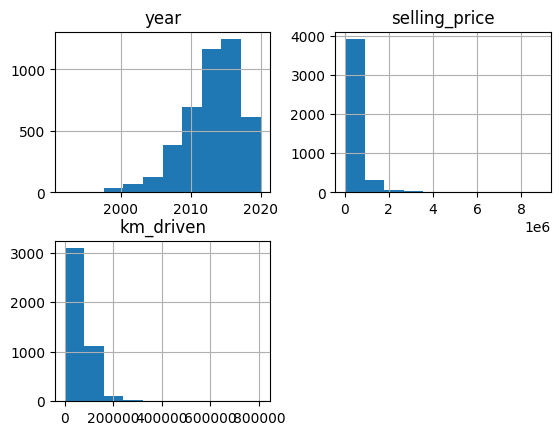

In [140]:
df.hist()

# Funciones de agregación

In [141]:
# groupby & agg
  ## reset_index + sort_values
  ## rename column

#df.groupby('year').agg({'selling_price':['mean','max']}).reset_index().sort_values(by = 'year' , ascending = False).rename(columns = {'selling_price':'average_selling_price'}).head()
# count
#mean
#max
#min
#nunique

df.groupby('name').agg({'selling_price':'max', 'year':'max'}).reset_index().rename(columns = {'selling_price':'precio_venta'}).head()

#df.groupby("Gender").agg({"User ID": "nunique" , "Purchased" : "sum"}).reset_index()

# template = df.groupby('year').agg({'selling_price':['mean','max'] , 'km_driven':'mean'}).reset_index().sort_values(by = 'year' , ascending = False).rename(columns = {'selling_price':'average_selling_price'}).head()

,name,precio_venta,year
0,Ambassador CLASSIC 1500 DSL AC,120000.00,2005
1,Ambassador Classic 2000 Dsz,50000.00,2002
2,Ambassador Grand 1800 ISZ MPFI PW CL,430000.00,2012
3,Audi A4 1.8 TFSI,1200000.00,2012
4,Audi A4 2.0 TDI,1295000.00,2011


In [142]:
df_agg = df.groupby('year').agg({'selling_price':['mean','max'] , 'km_driven':'mean'}).reset_index().sort_values(by = 'year' , ascending = False).rename(columns = {'selling_price':'average_selling_price'})

# Visualización con pandas

In [ ]:
# scatter plot , line y bar plot

In [143]:
df_agg.columns.values.tolist()

[('year', ''),
 ('average_selling_price', 'mean'),
 ('average_selling_price', 'max'),
 ('km_driven', 'mean')]

In [144]:
df_agg.columns.values.tolist()

[('year', ''),
 ('average_selling_price', 'mean'),
 ('average_selling_price', 'max'),
 ('km_driven', 'mean')]

In [145]:
df_agg.head()

year average_selling_price            km_driven
                          mean        max      mean
26  2020             818479.12 4700000.00  11037.17
25  2019            1059020.48 4950000.00  20912.48
24  2018             910770.46 4800000.00  27233.78
23  2017             768909.84 8150000.00  40485.76
22  2016             608364.09 8900000.00  55205.90

In [146]:
df_agg.reset_index().rename(columns = {'average_selling_price':'precio_venta', 'km_driven':'km_conducidos', 'year':'año', 'mean' : 'media', 'index' : 'índice'}).head()

índice   año precio_venta            km_conducidos
                      media        max         media
0     26  2020    818479.12 4700000.00      11037.17
1     25  2019   1059020.48 4950000.00      20912.48
2     24  2018    910770.46 4800000.00      27233.78
3     23  2017    768909.84 8150000.00      40485.76
4     22  2016    608364.09 8900000.00      55205.90

<Axes: >

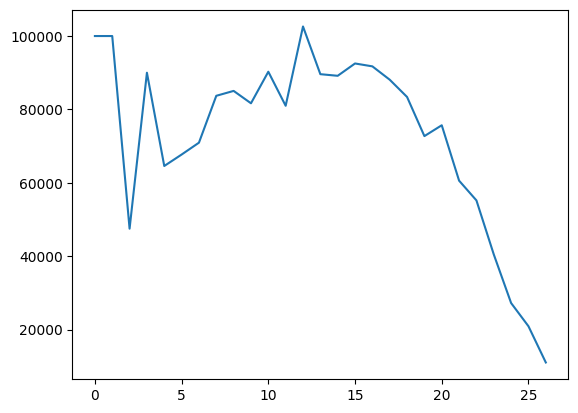

In [147]:
#una columna plot
df_agg[('km_driven','mean')].plot()

<Axes: xlabel='(year, )'>

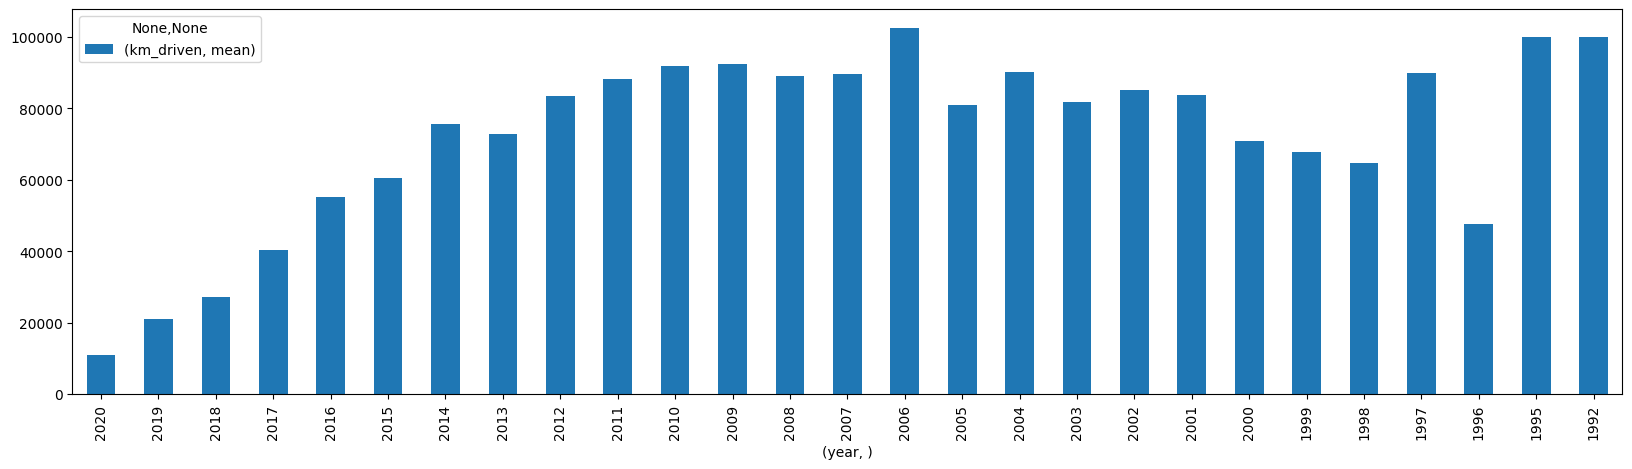

In [148]:
# dado input de eje x e y

df_agg.plot( x = ('year', '') , y = ('km_driven', 'mean'), kind = 'bar' , figsize = (20,5))


In [149]:
# filtro por columna
df_agg_hasta_2008 = df_agg[df_agg['year']>=2008]

<Axes: xlabel='(year, )'>

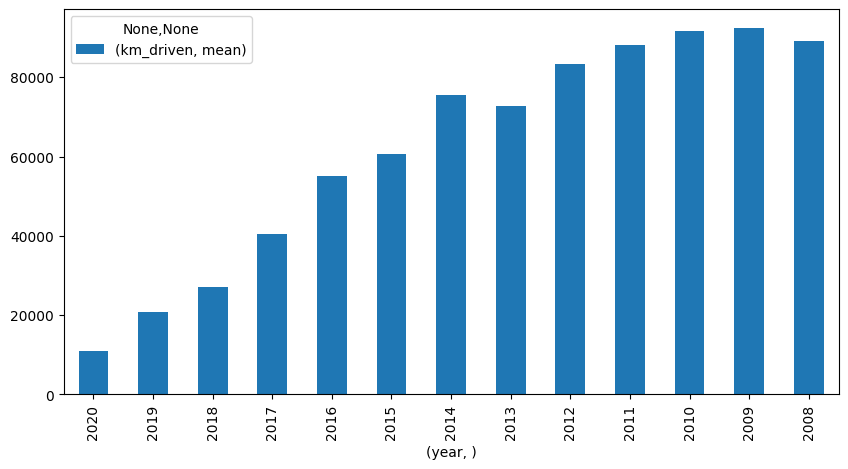

In [150]:
# dado input de eje x e y con filtro

df_agg_hasta_2008.plot(x = ('year','') , y = ('km_driven', 'mean'), kind = 'bar', figsize = (10,5))

#Reto

In [ ]:
# 1) Entiende mediante una agregacion cual es el coche más caro por año y pinta los máximos en un gráfico
# Consejo = renombra las columnas para que te sea más sencillo operar con ellas

# 2) Recomendación : ¿hay alguna ganga?
# Consejo = investiga si hay un coche relativamente nuevo (con pocos años) , con pocos km y a un precio menor con caracteristicas similares

In [162]:
df_max = df.loc[df.groupby('year')['selling_price'].idxmax(), ['year', 'name', 'selling_price']]
df_max = df_max.rename(columns={
    'year': 'Año',
    'name': 'Nombre vehículo',
    'selling_price': 'Precio (€)'
}).sort_values('Año', ascending=False).head(20)

<Axes: >

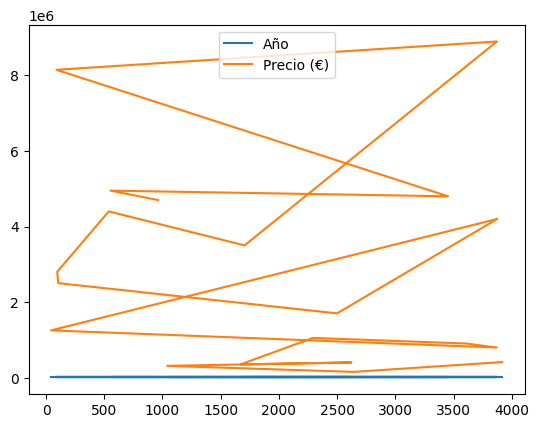

In [223]:
df_max.plot ()

<Axes: title={'center': 'Precio del vehículo más caro por año'}, xlabel='Año', ylabel='Precio (€)'>

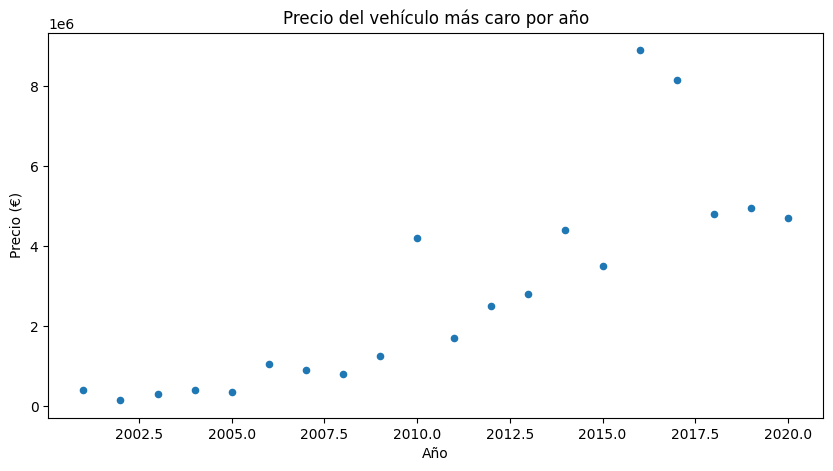

In [166]:
df_max.plot(
    x = 'Año' ,
    y = 'Precio (€)',
    kind = 'scatter' ,
    figsize = (10,5),
    title = 'Precio del vehículo más caro por año'
    )

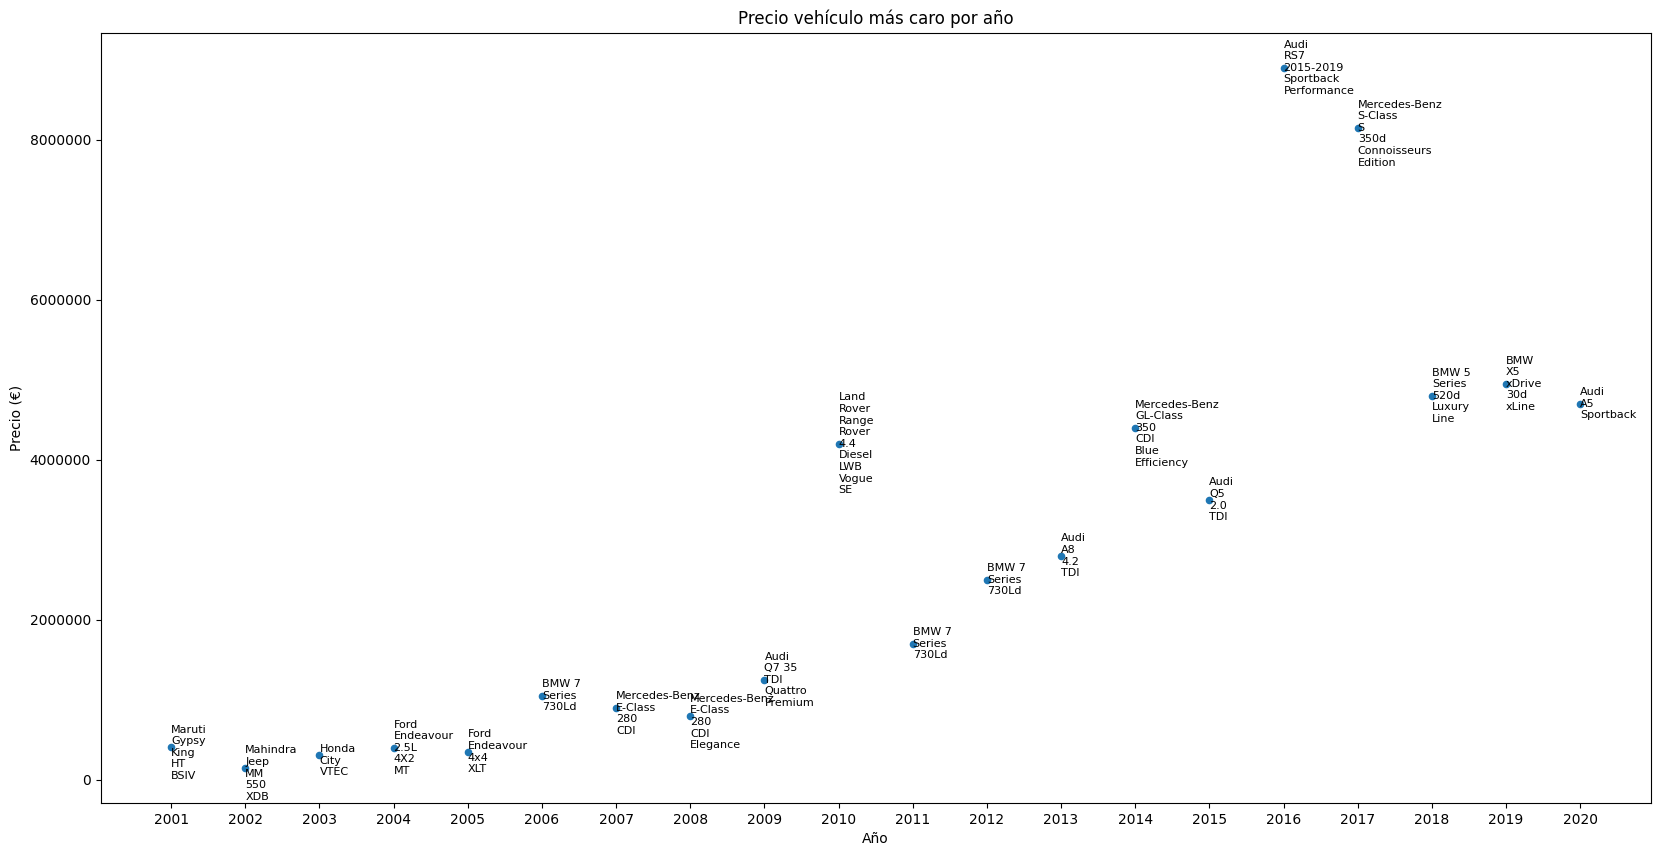

In [221]:
def wrap_text(text, max_len=10):
    """
    Divide un texto largo en varias líneas cada max_len caracteres aprox.
    """
    text = str(text)
    words = text.split()
    lines = []
    current = ""

    for w in words:
        if len(current) + len(w) + 1 <= max_len:
            current += (" " if current else "") + w
        else:
            lines.append(current)
            current = w
    lines.append(current)
    return "\n".join(lines)  # salto de línea

# --- Gráfico ---
ax = df_max.plot(
    x='Año',
    y='Precio (€)',
    kind='scatter',
    figsize=(20, 10),
    title='Precio vehículo más caro por año'
)

# --- Etiquetas con salto de línea automático ---
for i, row in df_max.iterrows():
    label = wrap_text(row['Nombre vehículo'], max_len=5)
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_xticks(df_max['Año'])
    ax.text(
        row['Año'],
        row['Precio (€)'],
        label,
        fontsize=8,
        ha='left',
        va='center'
    )
